In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
# to avoid encoding error, use 'unicode_escape'

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [3]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace= True)

In [9]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [4]:
# drop null values
df.dropna(inplace = True)

In [5]:
df.shape

(11239, 13)

In [6]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtype

dtype('int32')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
# describe() method returns description of the data in the dataFrame
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
# describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

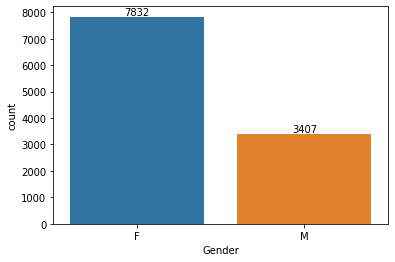

In [28]:
ax = sns.countplot(x = 'Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

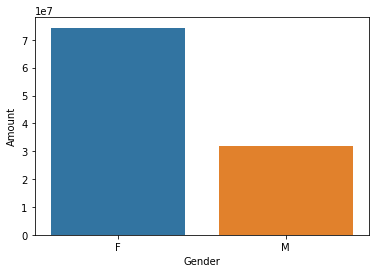

In [7]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x= 'Gender', y= 'Amount',data=sales_gen)

***From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men***

### Age

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

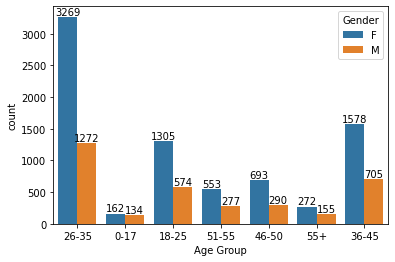

In [11]:
ax = sns.countplot(data=df , x = 'Age Group',hue = 'Gender')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

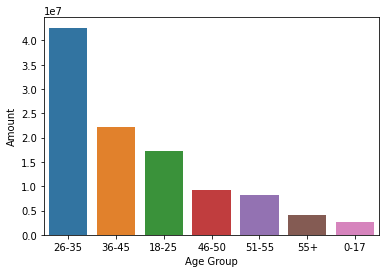

In [13]:
# Total amount vs Age Group
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sales_age, x='Age Group', y='Amount')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs females*

### State

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

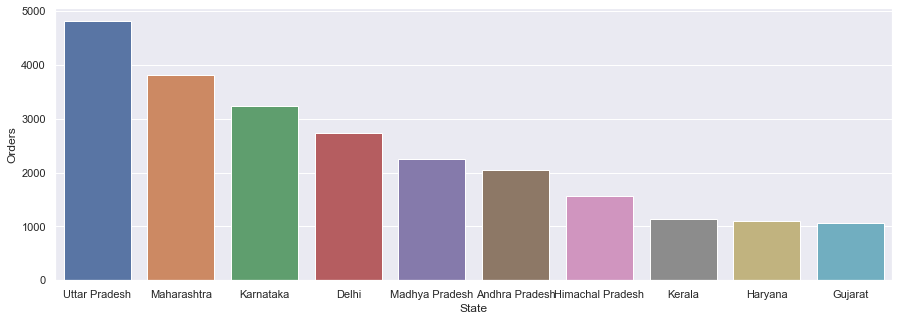

In [21]:
# Total number of orders from top 10 states
sales_state = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

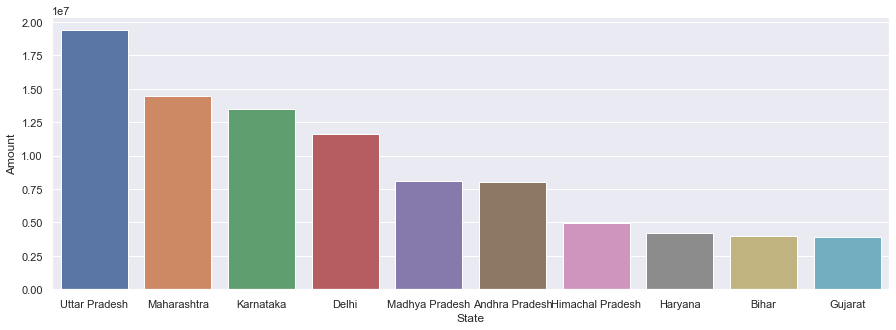

In [23]:
# Total amount/sales from top 10 states
sales_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data=sales_state)

*From above graphs we can see that most of the orders & total sales/amoumt are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital Status

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

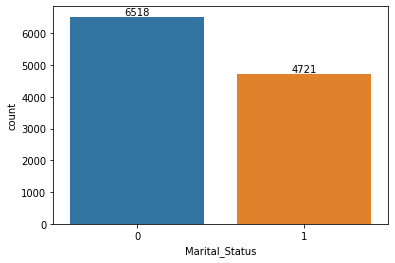

In [12]:
ax = sns.countplot(data = df, x='Marital_Status')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

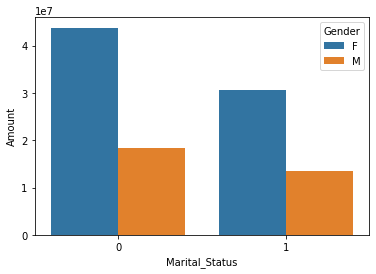

In [18]:
sales_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sales_status, x= 'Marital_Status', y='Amount',hue='Gender' )

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

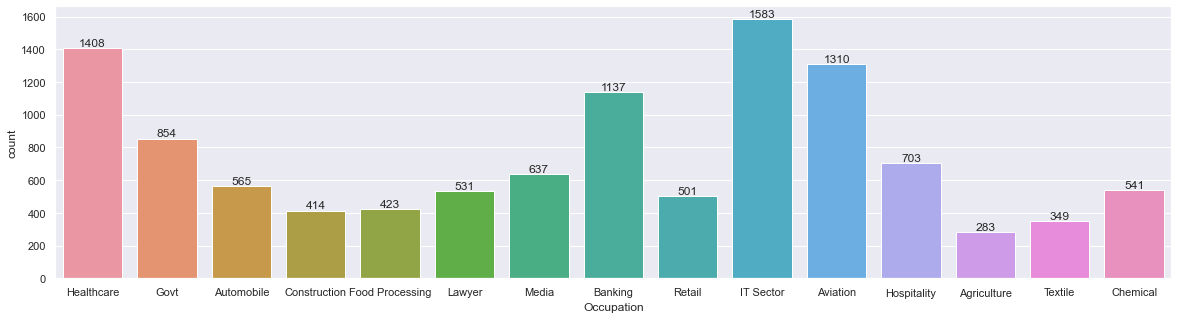

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x='Occupation')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

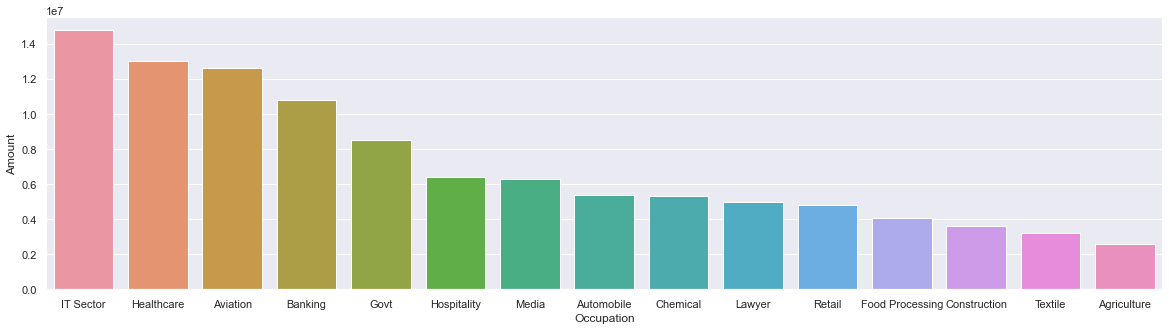

In [27]:
sales_occu = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_occu, x='Occupation', y='Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

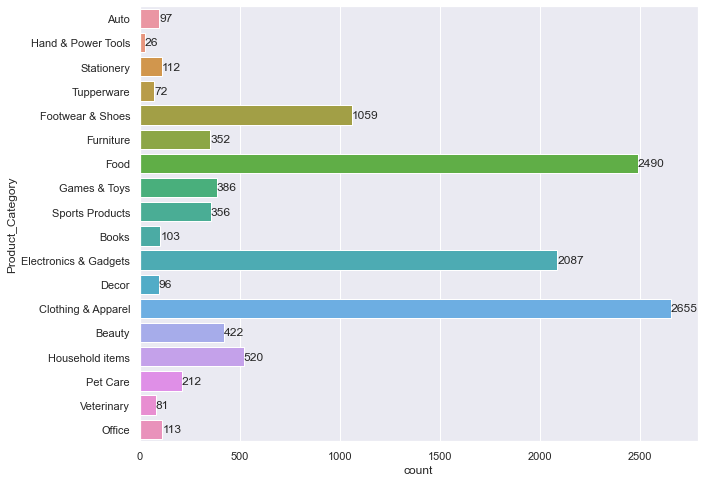

In [35]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(data=df, y='Product_Category')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

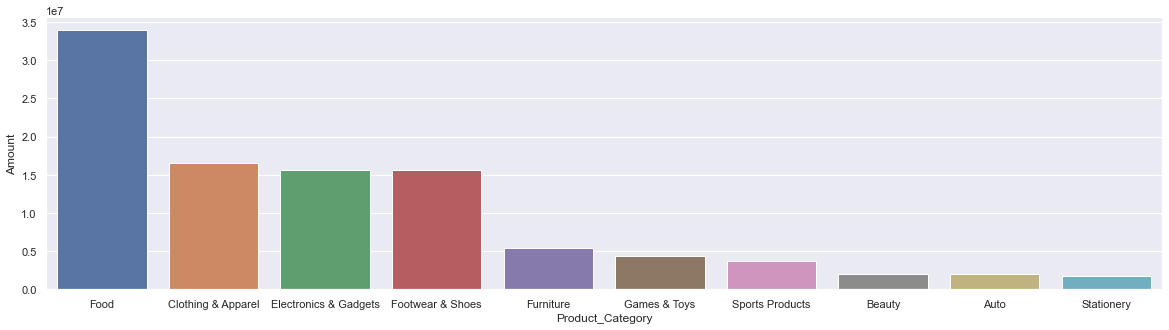

In [38]:
sns.set(rc={'figure.figsize':(20,5)})
sales_cat = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data=sales_cat, x='Product_Category', y='Amount')

*From above graphs we can see that most of the sold products are Food, Clothing and Electronics category*

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

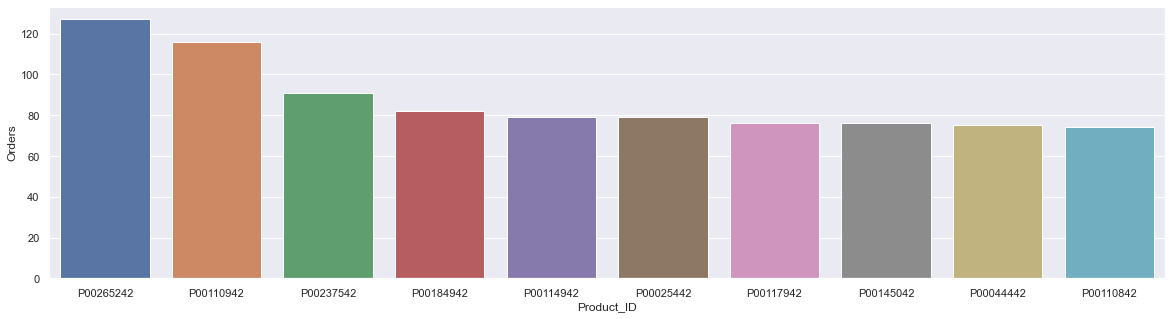

In [42]:
# top 10 most sold products

sales_pid = df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.barplot(data=sales_pid, x='Product_ID',y='Orders')

## Conclusion

*Married women age group 26-35 yrs from UP, Maharashtra, Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, clothing and Electronics category*

Complete project on GitHub: https://github.com/Shikhar711/Python_Diwali_Sales_Analysis
    
Thank you!